In [1]:
import torch
import matplotlib.pyplot as plt
import math

In [2]:
def initialize(segment):
    x_vec = torch.linspace(-torch.pi, torch.pi, segment)

    p_vec = torch.randn(segment) * 0.1
    p_vec.requires_grad = True

    a_vec = torch.randn(2) * 0.1
    a_vec.requires_grad = True

    return x_vec, p_vec, a_vec

In [3]:
def exp_and_coefficient(p_vec):
    exp_p = torch.exp(1j * p_vec)
    coeff = torch.fft.fft(exp_p) / len(exp_p)

    powers_of_minus_one = torch.pow(-1, torch.arange(len(p_vec)))
    corrected_coeff = coeff * powers_of_minus_one

    return corrected_coeff

In [4]:
def forward(x_vec, p_vec, a_vec, segment):
    actual_function = torch.exp(1j * p_vec)

    nega1, posi1 = a_vec[0], a_vec[1]
    term1 = (1.0 / math.sqrt(2)) * torch.exp(1j * nega1) * torch.exp(-1j * x_vec)
    term2 = (1.0 / math.sqrt(2)) * torch.exp(1j * posi1) * torch.exp(1j * x_vec)
    ideal_function = term1 + term2

    loss = torch.sum(torch.abs(actual_function - ideal_function) ** 2)/segment

    return loss


In [5]:
def train(epoches, learning_rate, segment=10000):
    x_vec, p_vec, a_vec = initialize(segment)

    loss_values = []

    for epoch in range(epoches):
        loss = forward(x_vec, p_vec, a_vec, segment)

        loss.backward()

        with torch.no_grad():
            p_vec -= learning_rate * p_vec.grad
            a_vec -= learning_rate * a_vec.grad

            p_vec.grad.zero_()
            a_vec.grad.zero_()

        loss_values.append(loss.item())
        print('Epoch:', epoch, 'Loss:', loss.item())

    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.grid(True)
    plt.show()

    return p_vec, a_vec

In [6]:
def visualize(p_vec,segment=1000):
  coefficient = exp_and_coefficient(p_vec)

  plt.figure(figsize=(36, 6))
  plt.subplot(1, 3, 1)
  plt.stem(p_vec.detach().numpy())
  plt.title("phase function")

  plt.subplot(1, 3, 2)
  plt.stem(torch.exp(1j*coefficient).detach().numpy())
  plt.title("transmittance function")

  plt.subplot(1, 3, 3)
  plt.stem(torch.abs(coefficient).detach().numpy())
  plt.title("Fouier coefficients function")



  print("Some Fourier Coefficients:")
  coeff_indices = [0, -1, 1, -2, 2, -3, 3, -4, 4]
  for index in coeff_indices:
    coeff_value = coefficient[index]
    magnitude = torch.abs(coeff_value).detach().item()
    magnitude_squared = magnitude ** 2
    print(f"coefficient {index}: Value: {coeff_value}, Magnitude: {magnitude}, Magnitude Squared: {magnitude_squared}")
  print("\n")

  print("Calculate Energy Efficiency:")
  print("Energy Efficiency =",(abs(coefficient[1])**2).item()+(abs(coefficient[-1])**2).item())
  print("\n")

  print("Test Energy Conservation:")
  frequency_energy = torch.sum(torch.abs(coefficient) ** 2).item()
  print("energy calculated by frequncy domain", frequency_energy)
  print("energy calculated by space domain should be 1")

  print(a_vec)
  # print(p_vec)

Epoch: 0 Loss: 2.004732370376587
Epoch: 1 Loss: 2.004610061645508
Epoch: 2 Loss: 2.004490852355957
Epoch: 3 Loss: 2.0043745040893555
Epoch: 4 Loss: 2.0042598247528076
Epoch: 5 Loss: 2.0041463375091553
Epoch: 6 Loss: 2.0040338039398193
Epoch: 7 Loss: 2.0039215087890625
Epoch: 8 Loss: 2.0038087368011475
Epoch: 9 Loss: 2.003695249557495
Epoch: 10 Loss: 2.0035805702209473
Epoch: 11 Loss: 2.0034635066986084
Epoch: 12 Loss: 2.0033442974090576
Epoch: 13 Loss: 2.0032217502593994
Epoch: 14 Loss: 2.0030953884124756
Epoch: 15 Loss: 2.0029642581939697
Epoch: 16 Loss: 2.002828598022461
Epoch: 17 Loss: 2.0026867389678955
Epoch: 18 Loss: 2.0025384426116943
Epoch: 19 Loss: 2.002382516860962
Epoch: 20 Loss: 2.00221848487854
Epoch: 21 Loss: 2.0020453929901123
Epoch: 22 Loss: 2.001862049102783
Epoch: 23 Loss: 2.0016672611236572
Epoch: 24 Loss: 2.001460313796997
Epoch: 25 Loss: 2.001239776611328
Epoch: 26 Loss: 2.001004219055176
Epoch: 27 Loss: 2.0007522106170654
Epoch: 28 Loss: 2.0004827976226807
Epoch: 

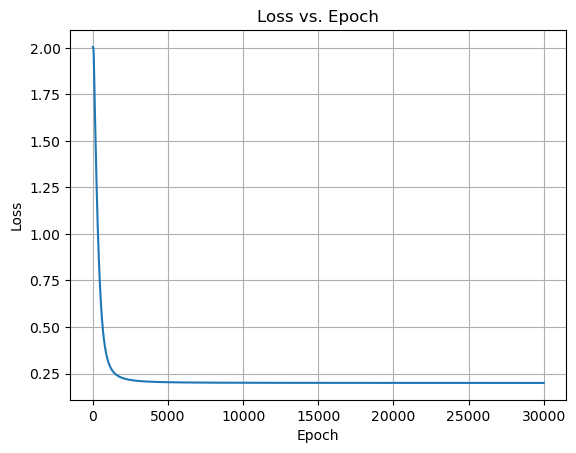

In [7]:
p_vec, a_vec = train(30000,1,1000)

/home/yangbc/mambaforge/envs/torch/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/yangbc/mambaforge/envs/torch/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Some Fourier Coefficients:
coefficient 0: Value: (0.011864073574543-0.0012758460361510515j), Magnitude: 0.011932477355003357, Magnitude Squared: 0.0001423840158276679
coefficient -1: Value: (0.1652156412601471+0.6147426962852478j), Magnitude: 0.6365569829940796, Magnitude Squared: 0.40520479259852493
coefficient 1: Value: (-0.16126102209091187+0.6158427000045776j), Magnitude: 0.6366060972213745, Magnitude Squared: 0.40526732301943014
coefficient -2: Value: (-0.009656503796577454+0.006983157712966204j), Magnitude: 0.011916901916265488, Magnitude Squared: 0.00014201255128189205
coefficient 2: Value: (-0.010922282934188843-0.004768239799886942j), Magnitude: 0.01191773358732462, Magnitude Squared: 0.00014203237385844534
coefficient -3: Value: (-0.14935994148254395-0.1505466252565384j), Magnitude: 0.2120676338672638, Magnitude Squared: 0.04497268133405985
coefficient 3: Value: (0.148349329829216-0.15161070227622986j), Magnitude: 0.2121163159608841, Magnitude Squared: 0.04499333149681761
coe

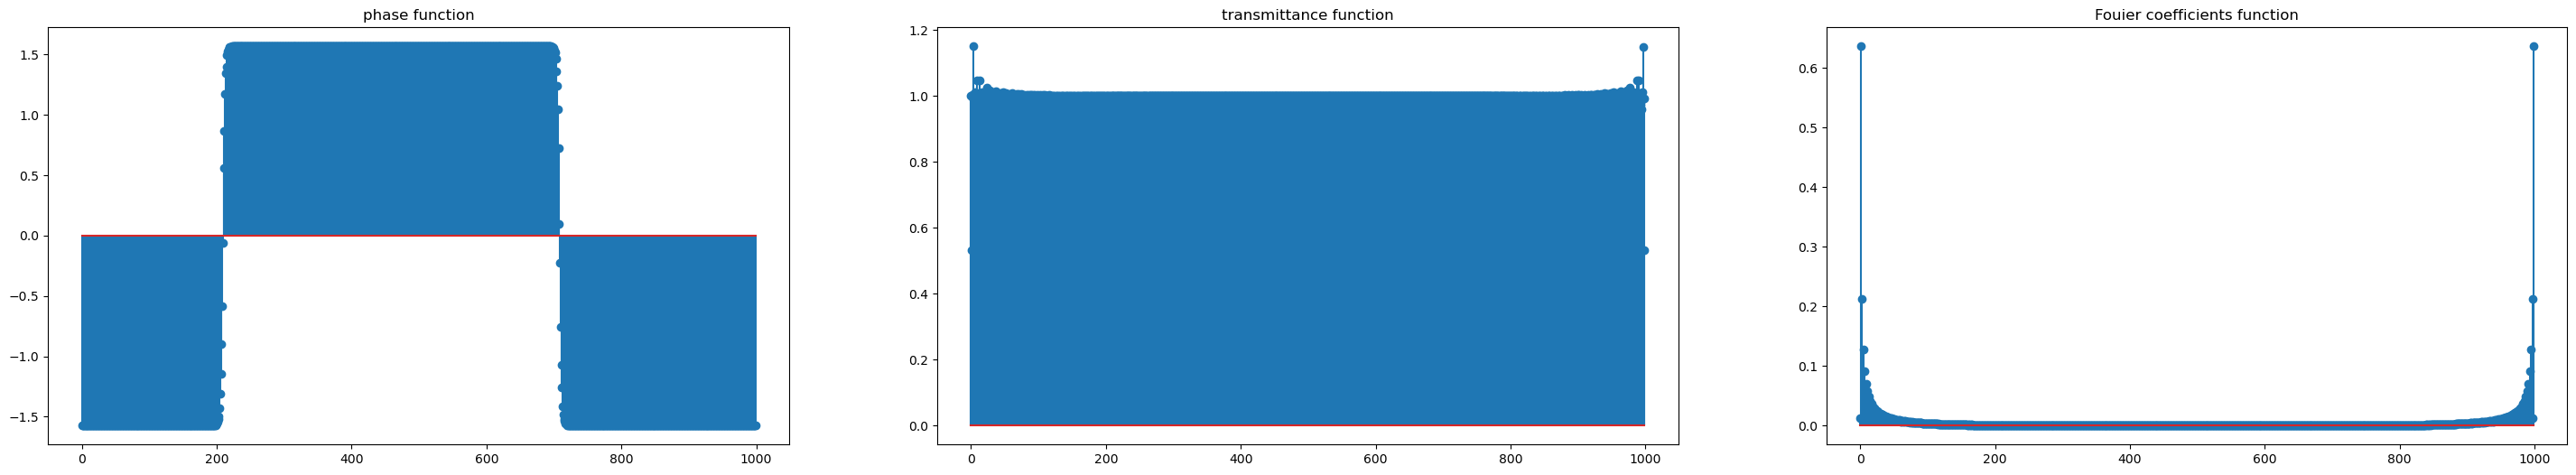

In [8]:
visualize(p_vec)